# Implementing explainable AI (XAI) with SHAP for classification problem

## 1. Prerequisite

In [1]:
# Importing modules
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import shap

## 2. Data Loading

In [2]:
# Feature matrix
X = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)

# Target labels
y = load_breast_cancer().target

In [3]:
# Lables decoding
y = y.astype(str)
y[np.where(y=="0")[0]] = load_breast_cancer().target_names[0]
y[np.where(y=="1")[0]] = load_breast_cancer().target_names[1]

## 3. Preprocessing

In [4]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Scaler
scaler = StandardScaler()

# Scaling training data
X_train = scaler.fit_transform(X_train) 
X_train = pd.DataFrame(X_train, columns=X.columns)

# Scaling test data
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)

## 4. Training

In [6]:
# Model
model = RandomForestClassifier(random_state=42)

# Training
model = model.fit(X_train, y_train)

## 5. Testing

In [7]:
# Testing
y_pred = model.predict(X_test)

In [8]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      benign       0.96      0.99      0.98       108
   malignant       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



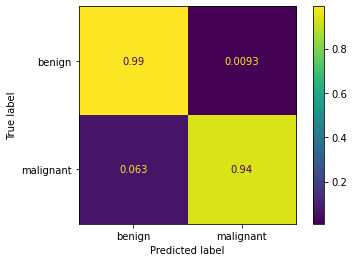

In [9]:
# Confusion_matrix
cmat = confusion_matrix(y_test, y_pred, labels=model.classes_, normalize="true")
disp_cmat = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=model.classes_)
disp_cmat.plot()

## 6. Shap Analysis

In [10]:
# Calculating shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

### 6.1. Shap Barplots (summary plot)

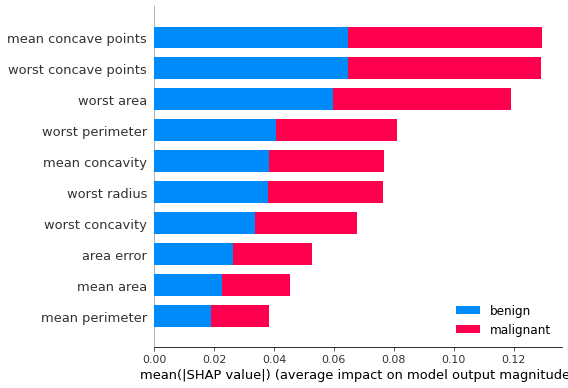

In [11]:
shap.summary_plot(shap_values, X_test, max_display=10, class_names=model.classes_)

Shap summary plot (bar plot) for benign class


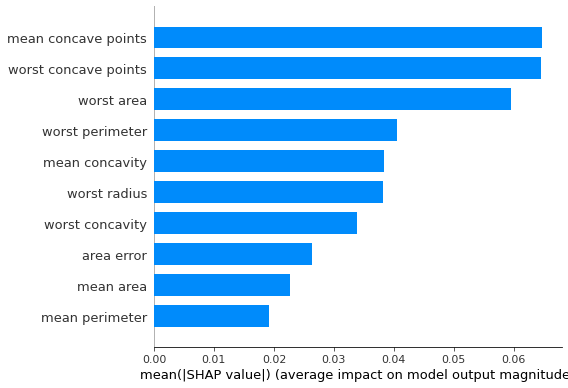

Shap summary plot (bar plot) for malignant class


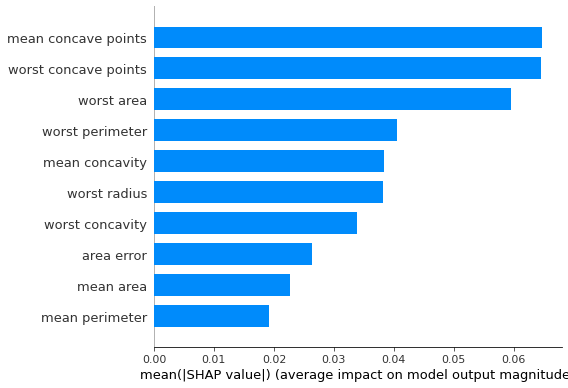

In [12]:
for class_ in range(len(model.classes_)):
    print(f"Shap summary plot (bar plot) for {model.classes_[class_]} class")
    shap.summary_plot(shap_values[class_], X_test, max_display=10, plot_type="bar", class_names=model.classes_)

### 6.2. Shap Dotplots (summary plot)

Shap summary plot (dot plot) for benign class


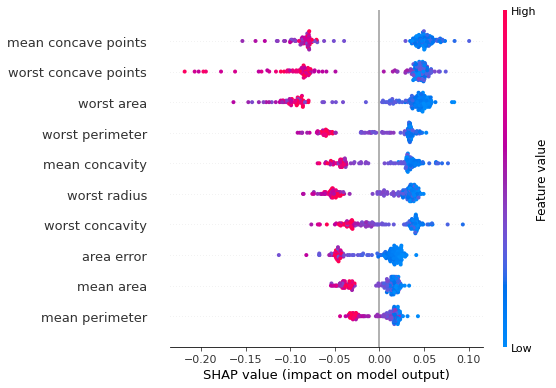

Shap summary plot (dot plot) for malignant class


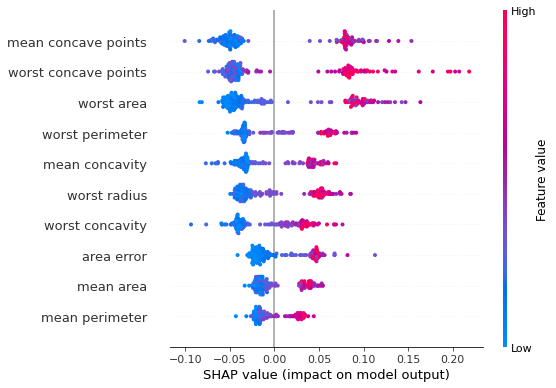

In [13]:
for class_ in range(len(model.classes_)):
    print(f"Shap summary plot (dot plot) for {model.classes_[class_]} class")
    shap.summary_plot(shap_values[class_], X_test, max_display=10,plot_type="dot", class_names=model.classes_)

### 6.3. Shap Violin-plots (summary plot)

Shap summary plot (violin plot) for benign class


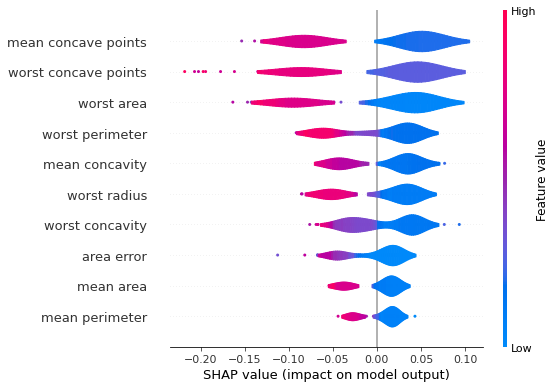

Shap summary plot (violin plot) for malignant class


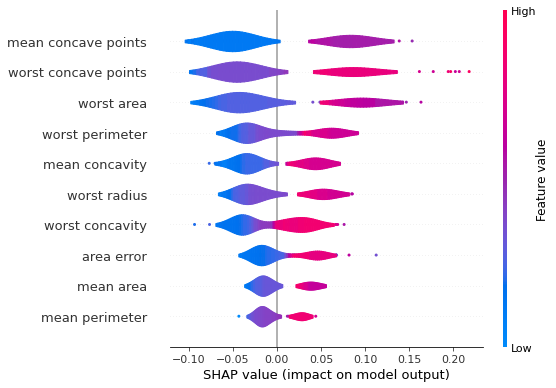

In [14]:
for class_ in range(len(model.classes_)):
    print(f"Shap summary plot (violin plot) for {model.classes_[class_]} class")
    shap.summary_plot(shap_values[class_], X_test, max_display=10,plot_type="violin", class_names=model.classes_)

In [15]:
# Calculating shap values (shap value + explainations)
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)

### 6.4. Shap Beeswarm-plots

Shap beeswarm plot for benign class


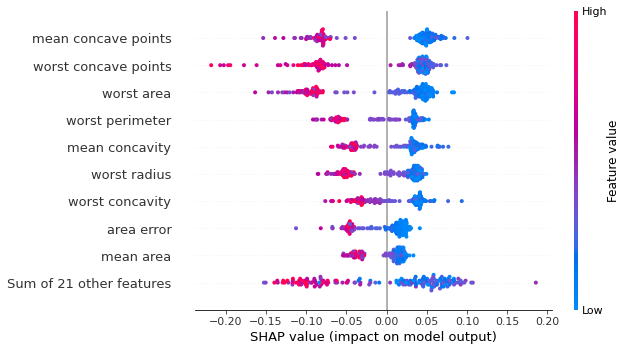

Shap beeswarm plot for malignant class


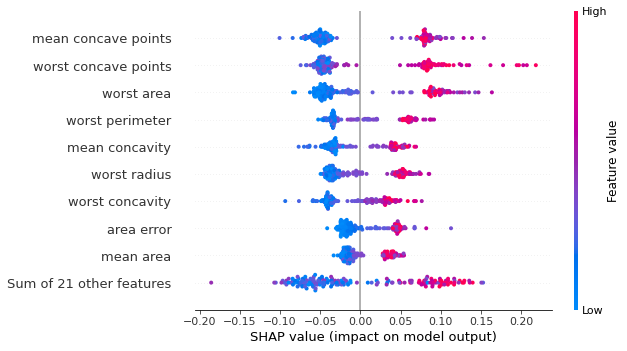

In [16]:
for class_ in range(len(model.classes_)):
    print(f"Shap beeswarm plot for {model.classes_[class_]} class")
    shap.plots.beeswarm(shap_values[:,:,class_])

### 6.5. Shap Scatter-plots

Shap scatter plot for benign class


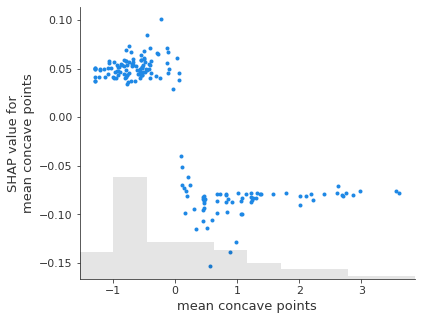

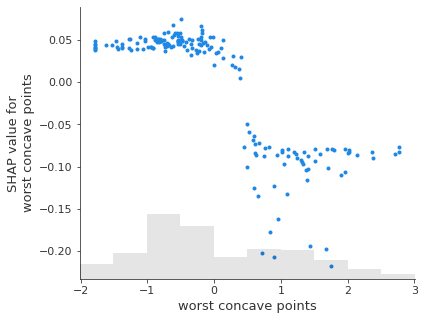

Shap scatter plot for malignant class


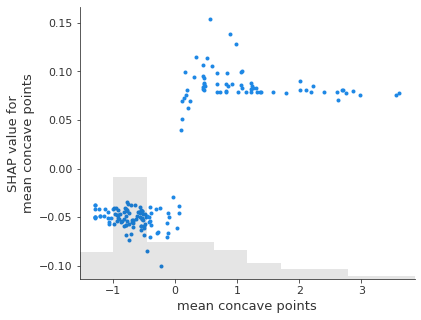

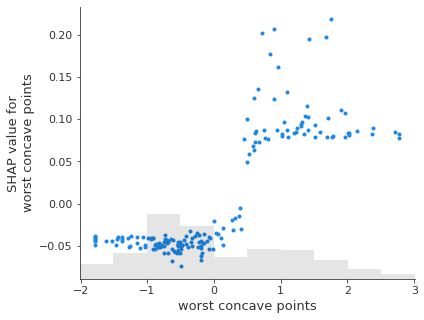

In [17]:
best_features = ["mean concave points", "worst concave points"]
for class_ in range(len(model.classes_)):
    print(f"Shap scatter plot for {model.classes_[class_]} class")
    x= [shap.plots.scatter(shap_values[:, i, class_], hist=True) 
        for i in X.columns[np.where(np.isin(X.columns, best_features)==True)[0]]]